In [1]:
# Install necessary libraries
!pip install crewai crewai-tools requests

In [2]:
import os
from crewai import Agent, Task, Crew, Process

# --- 1. SETUP API KEYS (The Master Trick) ---

os.environ["OPENAI_API_KEY"] = "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" 
os.environ["OPENAI_API_BASE"] = "https://api.groq.com/openai/v1"
os.environ["OPENAI_MODEL_NAME"] = "llama-3.3-70b-versatile"

# --- 2. DEFINE AGENTS ---

# Agent 1: Researcher
researcher = Agent(
    role='Senior Research Analyst',
    goal='Uncover detailed and fascinating information about the topic: {topic}',
    backstory="You are an expert researcher. You gather key facts, statistics, and interesting trends.",
    allow_delegation=False,
    verbose=True
)

# Agent 2: Writer
writer = Agent(
    role='Instagram Content Strategist',
    goal='Write an engaging Instagram post (Caption + Hashtags) based on the research.',
    backstory="You are a social media pro. You write catchy captions (short & long) that grab attention.",
    allow_delegation=False,
    verbose=True
)

# Agent 3: Reviewer
reviewer = Agent(
    role='Senior Content Editor',
    goal='Review the Instagram post for clarity, grammar, and engagement tone.',
    backstory="You are a strict editor. You ensure the content is perfect and error-free.",
    allow_delegation=False,
    verbose=True
)

# Agent 4: Prompt Engineer
prompt_engineer = Agent(
    role='AI Visual Specialist',
    goal='Create a detailed text-to-image prompt to generate a visual for the post.',
    backstory="You know how to talk to AI Image Generators. You write detailed prompts describing lighting, style, and subject.",
    allow_delegation=False,
    verbose=True
)

print("✅ Setup Complete & Agents Ready!")

✅ Setup Complete & Agents Ready!


In [3]:
# --- 3. DEFINE TASKS ---

task_research = Task(
    description='Research the latest trends and key points about the topic: {topic}. Identify 3 fascinating facts.',
    expected_output='A summary of 3 key trends/facts about the topic.',
    agent=researcher
)

task_writing = Task(
    description='Using the research, write an Instagram post. Include a catchy hook, a short caption, a long caption, and 10 relevant hashtags.',
    expected_output='A complete Instagram post text with hashtags.',
    agent=writer
)

task_review = Task(
    description='Review the Instagram post. Ensure the tone is engaging and there are no grammatical errors.',
    expected_output='Final polished Instagram post.',
    agent=reviewer
)

task_image_prompt = Task(
    description='Create a highly detailed text-to-image prompt based on the Instagram post content. Return ONLY the prompt text description, nothing else.',
    expected_output='A single detailed image generation prompt.',
    agent=prompt_engineer
)

# --- 4. CREATE CREW & KICKOFF ---

crew = Crew(
    agents=[researcher, writer, reviewer, prompt_engineer],
    tasks=[task_research, task_writing, task_review, task_image_prompt],
    verbose=True,
    memory=False # Disabling memory to avoid extra API calls
)

#topic = "The Future of AI in Healthcare"
topic = "The Beauty of Cox's Bazar"

print(f"🚀 Starting the crew for topic: {topic} ...")
result = crew.kickoff(inputs={'topic': topic})

print("\n\n########################")
print("## FINAL RESULT (PROMPT) ##")
print("########################\n")
print(result)

🚀 Starting the crew for topic: The Beauty of Cox's Bazar ...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: d07660e4-63b6-491a-b139-b88427e48265                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research Analyst                                                                                 │
│                                                                                                                 │
│  Task: Research the latest trends and key points about the topic: The Beauty of Cox's Bazar. Identify 3         │
│  fascinating facts.                                                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research Analyst                                                                                 │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  The Beauty of Cox's Bazar is a topic that encompasses a wide range of fascinating aspects, from its stunning   │
│  natural beauty to its rich cultural heritage. Located in Bangladesh, Cox's Bazar is renowned for being the     │
│  world's longest natural sea beach, with a plethora of exciting attractions and activities that cater to        │
│  diverse interests. Here are 3 fascinating facts about the beauty of Cox's Bazar:                               │
│                                                                                                                 │
│  1. **The Longest Natural Sea Beach**: Cox's Bazar boasts the longest natural sea beach in the world,           │
│  stretching approximately 75 miles (120 kilometers) along the Bay of Bengal. This unparalleled natural wonder   │
│  is not only a feast for the eyes, with its pristine white sand and crystal-clear waters, but it also offers a  │
│  serene and tranquil environment that attracts millions of tourists and locals alike. The beach is dotted with  │
│  an array of small shops, restaurants, and hotels, making it an ideal spot for relaxation and leisure.          │
│                                                                                                                 │
│  2. **Biodiversity and Wildlife**: The Cox's Bazar region is home to a diverse range of flora and fauna,        │
│  contributing significantly to its natural beauty. The area is particularly famous for its marine life, with a  │
│  variety of fish species, dolphins, and even occasional sightings of whales. Additionally, the nearby forests   │
│  and mangrove swamps are habitats for numerous bird species, monkeys, and other wildlife. The presence of       │
│  these ecosystems not only adds to the aesthetic appeal of Cox's Bazar but also underscores the importance of   │
│  conservation efforts in the region.                                                                            │
│                                                                                                                 │
│  3. **Cultural and Historical Significance**: Beyond its natural beauty, Cox's Bazar is also steeped in         │
│  cultural and historical significance. The area is home to several ancient temples, pagodas, and mosques,       │
│  reflecting the diverse religious heritage of Bangladesh. The Cox's Bazar district is also known for its        │
│  traditional festivals and crafts, such as the production of beautiful handicrafts and the celebration of       │
│  traditional Bengali festivals like the Rash Mela. This blend of natural beauty, cultural richness, and         │
│  historical depth makes Cox's Bazar a truly unique and captivating destination for travelers and researchers    │
│  alike.                                                                                                         │
│                                                                                                                 │
│  These aspects of Cox's Bazar highlight the multifaceted nature of its beauty, encompassing natural wonders,    │
│  cultural diversity, and historical significance. The region stands as a testament to the country's rich        │
│  heritage and its potential as a premier tourist destination, offering something for every kind of visitor.     │
│                                                        

Output()

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: d0d7ba47-643d-43c5-b0b0-6c5443cf0da2                                                                     │
│  Agent: Senior Research Analyst                                                                                 │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Instagram Content Strategist                                                                            │
│                                                                                                                 │
│  Task: Using the research, write an Instagram post. Include a catchy hook, a short caption, a long caption,     │
│  and 10 relevant hashtags.                                                                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Instagram Content Strategist                                                                            │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  "Discover the Hidden Gem of Cox's Bazar!                                                                       │
│  Short Caption: Explore the world's longest natural sea beach, vibrant culture, and breathtaking biodiversity!  │
│  Long Caption: Imagine walking along the world's longest natural sea beach, feeling the soft white sand         │
│  between your toes and witnessing the majestic sunrise over the Bay of Bengal. Cox's Bazar, located in          │
│  Bangladesh, is a treasure trove of natural beauty, rich cultural heritage, and exciting activities. From its   │
│  stunning 75-mile long beach to its diverse marine life, including dolphins and whales, and vibrant festivals   │
│  like the Rash Mela, Cox's Bazar has something for every kind of traveler. Whether you're looking to relax in   │
│  a serene environment, explore ancient temples and pagodas, or experience the local crafts and traditions,      │
│  Cox's Bazar is a must-visit destination. So come and uncover the beauty of Cox's Bazar!                        │
│  #CoxsBazar #LongestSeaBeach #BangladeshTourism #NaturalWonders #CulturalHeritage #TravelDiaries #BeachLife     │
│  #WildlifeConservation #TouristDestination #ParadiseFound"                                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: d0f80a3c-3ec4-4990-8b38-2bedbf9b0a68                                                                     │
│  Agent: Instagram Content Strategist                                                                            │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Content Editor                                                                                   │
│                                                                                                                 │
│  Task: Review the Instagram post. Ensure the tone is engaging and there are no grammatical errors.              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Content Editor                                                                                   │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  "Discover the Hidden Gem of Cox's Bazar!                                                                       │
│  Explore the world's longest natural sea beach, vibrant culture, and breathtaking biodiversity!                 │
│  Imagine walking along the world's longest natural sea beach, feeling the soft white sand between your toes     │
│  and witnessing the majestic sunrise over the Bay of Bengal. Cox's Bazar, located in Bangladesh, is a treasure  │
│  trove of natural beauty, rich cultural heritage, and exciting activities. From its stunning 75-mile long       │
│  beach to its diverse marine life, including dolphins and whales, and vibrant festivals like the Rash Mela,     │
│  Cox's Bazar has something for every kind of traveler. Whether you're looking to relax in a serene              │
│  environment, explore ancient temples and pagodas, or experience the local crafts and traditions, Cox's Bazar   │
│  is a must-visit destination. So come and uncover the beauty of Cox's Bazar!                                    │
│  #CoxsBazar #LongestSeaBeach #BangladeshTourism #NaturalWonders #CulturalHeritage #TravelDiaries #BeachLife     │
│  #WildlifeConservation #TouristDestination #ParadiseFound"                                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 933af07f-a0bd-4272-b76b-1d9bb6a2b186                                                                     │
│  Agent: Senior Content Editor                                                                                   │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: AI Visual Specialist                                                                                    │
│                                                                                                                 │
│  Task: Create a highly detailed text-to-image prompt based on the Instagram post content. Return ONLY the       │
│  prompt text description, nothing else.                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: AI Visual Specialist                                                                                    │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Generate an image of a serene and vibrant scene at Cox's Bazar, with the world's longest natural sea beach as  │
│  the central focus. The sky is painted with warm hues of a majestic sunrise over the Bay of Bengal, with the    │
│  sun's golden rays reflecting off the crystal-clear waters. The beach is dotted with a few people walking       │
│  along the shoreline, feeling the soft white sand between their toes, while others are relaxing under colorful  │
│  beach umbrellas or taking a dip in the calm waters. In the distance, a few traditional Bengali fishing boats   │
│  are anchored, adding a touch of local culture to the scene. The foreground features a beautiful arrangement    │
│  of local handicrafts, such as woven baskets, textiles, and traditional clothing, showcasing the rich cultural  │
│  heritage of Cox's Bazar. To the left, a glimpse of the nearby forests and mangrove swamps can be seen, with a  │
│  few birds flying overhead, highlighting the region's breathtaking biodiversity. The image should convey a      │
│  sense of tranquility, wonder, and excitement, inviting the viewer to discover the hidden gem of Cox's Bazar.   │
│  The style should be reminiscent of a tropical paradise, with vibrant colors, lush greenery, and warm           │
│  lighting, blending traditional and modern elements to create a unique visual representation of this            │
│  incredible destination. The image should be generated in a highly detailed and realistic manner, with          │
│  intricate textures, patterns, and lighting effects that bring the scene to life. The overall mood should be    │
│  captivating, inspiring, and thought-provoking, making the viewer want to learn more about the beauty of Cox's  │
│  Bazar and experience it for themselves.                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 1d94df45-c393-4b3e-b4ed-ca0363e7a190                                                                     │
│  Agent: AI Visual Specialist                                                                                    │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯



########################
## FINAL RESULT (PROMPT) ##
########################

Generate an image of a serene and vibrant scene at Cox's Bazar, with the world's longest natural sea beach as the central focus. The sky is painted with warm hues of a majestic sunrise over the Bay of Bengal, with the sun's golden rays reflecting off the crystal-clear waters. The beach is dotted with a few people walking along the shoreline, feeling the soft white sand between their toes, while others are relaxing under colorful beach umbrellas or taking a dip in the calm waters. In the distance, a few traditional Bengali fishing boats are anchored, adding a touch of local culture to the scene. The foreground features a beautiful arrangement of local handicrafts, such as woven baskets, textiles, and traditional clothing, showcasing the rich cultural heritage of Cox's Bazar. To the left, a glimpse of the nearby forests and mangrove swamps can be seen, with a few birds flying overhead, highlighting the regio

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: d07660e4-63b6-491a-b139-b88427e48265                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: Generate an image of a serene and vibrant scene at Cox's Bazar, with the world's longest         │
│  natural sea beach as the central focus. The sky is painted with warm hues of a majestic sunrise over the Bay   │
│  of Bengal, with the sun's golden rays reflecting off the crystal-clear waters. The beach is dotted with a few  │
│  people walking along the shoreline, feeling the soft white sand between their toes, while others are relaxing  │
│  under colorful beach umbrellas or taking a dip in the calm waters. In the distance, a few traditional Bengali  │
│  fishing boats are anchored, adding a touch of local culture to the scene. The foreground features a beautiful  │
│  arrangement of local handicrafts, such as woven baskets, textiles, and traditional clothing, showcasing the    │
│  rich cultural heritage of Cox's Bazar. To the left, a glimpse of the nearby forests and mangrove swamps can    │
│  be seen, with a few birds flying overhead, highlighting the region's breathtaking biodiversity. The image      │
│  should convey a sense of tranquility, wonder, and excitement, inviting the viewer to discover the hidden gem   │
│  of Cox's Bazar. The style should be reminiscent of a tropical paradise, with vibrant colors, lush greenery,    │
│  and warm lighting, blending traditional and modern elements to create a unique visual representation of this   │
│  incredible destination. The image should be generated in a highly detailed and realistic manner, with          │
│  intricate textures, patterns, and lighting effects that bring the scene to life. The overall mood should be    │
│  captivating, inspiring, and thought-provoking, making the viewer want to learn more about the beauty of Cox's  │
│  Bazar and experience it for themselves.                                                                        │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🎨 Generating High-Quality Image via Flux Model...
📝 Prompt: Generate an image of a serene and vibrant scene at Cox's Bazar, with the world's longest natural sea...
⏳ Please wait 10-15 seconds...

✅ Success! HD Image Generated:


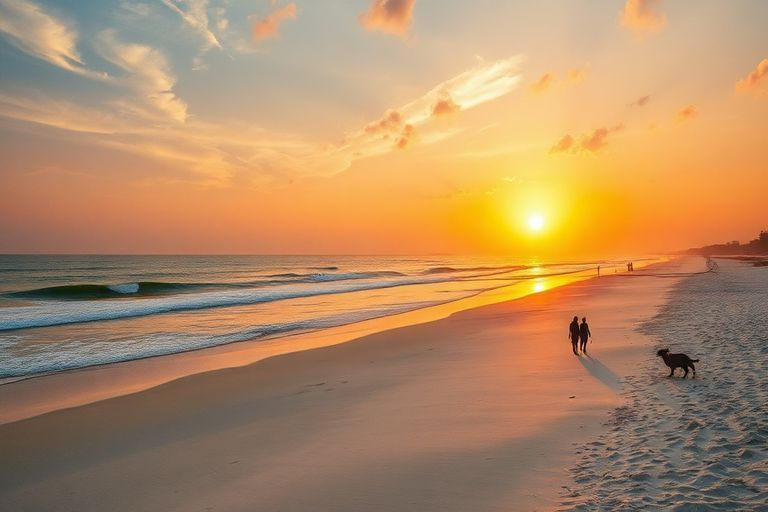

In [4]:
import requests
from PIL import Image
from IPython.display import display
import io
import urllib.parse
import random

# IMAGE GENERATION ( - FLUX) ---

try:
    base_prompt = str(result)[:400]
except NameError:
    print("⚠️ Note: 'result' variable not found. Using a default test prompt.")
    base_prompt = "A futuristic hospital with AI robots, highly detailed, 8k, cinematic lighting"

# Enhance prompt for better quality
prompt_text = f"{base_prompt}, realistic, 8k, highly detailed, futuristic"
encoded_prompt = urllib.parse.quote(prompt_text)

# 2. Random Seed
seed = random.randint(1, 100000)

# 3. Construct URL (Using Flux Model for High Quality)
image_url = f"https://image.pollinations.ai/prompt/{encoded_prompt}?model=flux&width=768&height=512&seed={seed}&nologo=true"

print(f"🎨 Generating High-Quality Image via Flux Model...")
print(f"📝 Prompt: {prompt_text[:100]}...")
print("⏳ Please wait 10-15 seconds...")

try:
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(image_url, headers=headers, timeout=60)

    if response.status_code == 200:
        image_bytes = response.content
        image = Image.open(io.BytesIO(image_bytes))
        
        print("\n✅ Success! HD Image Generated:")
        display(image)
    else:
        print(f"\n❌ Error: Server returned status {response.status_code}")

except Exception as e:
    print(f"\n❌ Connection Error: {e}")